In [66]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [67]:
df = pd.read_csv("data/covid/france/evolution_par_jour.csv", sep=",")
df.tail()

,Unnamed: 0,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,gueris,depistes,source_nom,source_url,source_archive,source_type,susceptible
100,100,2020-05-08,pays,FRA,France,138421.0,72548.0,34890.0,NaN,16497.0,9733.0,2868.0,22724.0,55782.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66789300.0
101,101,2020-05-09,pays,FRA,France,138854.0,72850.0,35046.0,NaN,16573.0,9737.0,2812.0,22614.0,56038.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788535.0
102,102,2020-05-10,pays,FRA,France,139063.0,73143.0,35236.0,NaN,16642.0,9738.0,2776.0,22569.0,56217.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66788078.0
103,103,2020-05-11,pays,FRA,France,139519.0,73099.0,35195.0,NaN,16820.0,9823.0,2712.0,22284.0,56724.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66786937.0
104,104,2020-05-12,pays,FRA,France,140227.0,73435.0,35437.0,NaN,17003.0,9988.0,2542.0,21595.0,57785.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante,66784985.0


In [68]:
df = df[df["date"] < "2020-04-01"]

In [69]:
E0 = 1
y0 = S0, E0, I0, R0

f = lambda x, param : param*x**2 # la fonction
param_x = 0 # le paramètre à trouver
xrange = list(range(10)) # le nombre de valeurs tests
mesdonnees = [f(i, 2) for i in xrange] # les valeurs tests

In [70]:
params, covariance = scipy.optimize.curve_fit(f, xrange, mesdonnees) # fit
print(f"paramètres = {params}, covariances = {covariance}")

paramètres = [2.], covariances = [[0.]]


In [71]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

### Test curve fit sur les données covid (SEIR)

In [72]:
f = lambda t, beta, gamma, delta : (odeint(deriv, y0, t, args=(N, beta, gamma, delta)).T)[2] # [2] = only Infected
params, covariance = scipy.optimize.curve_fit(f, range(df.shape[0]), df["cas_confirmes"]) # fit
print(f"paramètres = {params}, covariances = {covariance}")

paramètres = [1.0970995  0.91237172 6.1316369 ], covariances = [[ 5.70778538e-04  4.71765447e-04 -2.48773819e-02]
 [ 4.71765447e-04  3.90118062e-04 -2.08174000e-02]
 [-2.48773819e-02 -2.08174000e-02  1.58123028e+00]]


In [73]:
beta = params[0]
gamma = params[1]
delta = params[2]

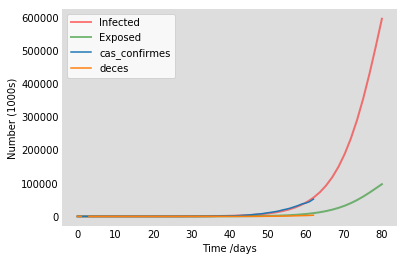

In [74]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 67000000
# Initial number of infected and recovered individuals, I0 and R0.
E0, I0, R0 = 1, 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - E0
# A grid of time points (in days)
t = np.linspace(0, 80)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma,delta))
S, E, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, E, 'g', alpha=0.5, lw=2, label='Exposed')
#ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
df[["cas_confirmes", "deces"]].plot(ax=ax)

#ax.set_xlim(0, 300)

plt.show()